<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-daniela-estevez/blob/main/Semana_6_Data_Analysis_with_Python_(IBM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis with Python

**Nombre 1:** Daniela Estevez Rodriguez

**Matricula 1:** A01793723
<br>
<br>

**Materia:** Ciencia y analítica de datos

**Profesor:** Jobish Vallikavungal Devassia

**Fecha:** 25 de Octubre de 2022

## Module 3 - Exploratory Data Analysis

In [103]:
#Librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [104]:
#Import dataframe from last module
url="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

#convierte los datos a un dataframe
df=pd.read_csv(url,header=None)

# Coloca nombres a columnas
headers = ["symboling", "normalized-losses","make", "fuel-type", "aspiration", "num-of-doors","body-style",
           "drive-wheels", "engine-location", "wheel-base", "length", "width", "height","curb-weight", "engine-type",
           "num-of-cylinders", "engine-size","fuel-system", "bore", "stroke","compression-ratio", "horsepower","peak-rpm", 
           "city-mpg", "highway-mpg", "price"]

df.columns=headers

In [105]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)
# reset index, because we droped some rows
df.reset_index(drop=True, inplace=True)

#Cambia columnas objeto a numericas
col=("normalized-losses", "bore", "stroke", "horsepower","peak-rpm", "price")

for c in col:
  #coverts ? to missing value
  df[c] = df[c].replace('?', np.nan)
  #change data-type
  df[c]=df[c].astype("float64")

################ 

#Replace missing values with mean
mean=df["normalized-losses"].mean()
df["normalized-losses"].replace(np.nan,mean)

avg_norm_loss = df["normalized-losses"].mean(axis=0)
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

avg_bore=df['bore'].mean(axis=0)
df["bore"].replace(np.nan, avg_bore, inplace=True)

avg_str=df['stroke'].mean(axis=0)
df["stroke"].replace(np.nan, avg_str, inplace=True)

avg_horsepower = df['horsepower'].mean(axis=0)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

avg_peakrpm=df['peak-rpm'].mean(axis=0)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

################ 

# Change mpg to L/100km
df["city-mpg"]=235/df["city-mpg"]
df["highway-mpg"] = 235/df["highway-mpg"]
#Rename column
df.rename(columns={"city-mpg":"city-L/100km"},inplace=True)
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

# Crea 4 numeros con la misma distancia 
bins=np.linspace(min(df["price"]),max(df["price"]),4)
# Crea una lista con los nombres de los grupos
group_names=["Low","Medium","High"]
# Crea los grupos
df["price-binned"]=pd.cut(df["price"],bins,labels=group_names,include_lowest=True)

#Create bins
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
#Create name of bins
group_names = ['Low', 'Medium', 'High']
#Created binned variable
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )

# Crea variable indicadora
pd.get_dummies(df["fuel-type"],drop_first=True)

# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

### Exploratory Data Analysis:
* Summary
* Understanding
* Extract

### Descriptive Statistics

In [106]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,0.836373,0.911588,0.898409,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,9.949525,8.034347,13207.129353
std,1.245307,31.681008,6.021776,0.059285,0.029671,0.040862,520.680204,41.642693,0.270844,0.313597,3.972040,39.519211,476.979093,2.573104,1.849782,7947.066342
min,-2.000000,65.000000,86.600000,0.678039,0.834025,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,4.795918,4.351852,5118.000000
25%,0.000000,101.000000,94.500000,0.799135,0.886584,0.869565,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,7.833333,6.911765,7775.000000
50%,1.000000,122.000000,97.000000,0.832292,0.905947,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,9.791667,7.833333,10295.000000
75%,2.000000,137.000000,102.400000,0.879865,0.925311,0.928094,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,12.368421,9.400000,16500.000000
max,3.000000,256.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,18.076923,14.687500,45400.000000


In [107]:
# Categorias de una variable
drive_wheels_counts=df["drive-wheels"].value_counts()
drive_wheels_counts

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [108]:
# Agrega título a las categorias de la variable
drive_wheels_counts.index.name="drive-wheels"
drive_wheels_counts

drive-wheels
fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

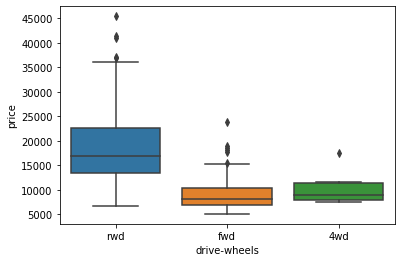

In [109]:
# Crea boxplot de variable
sns.boxplot(x="drive-wheels",y="price",data=df)

Text(0, 0.5, 'Price')

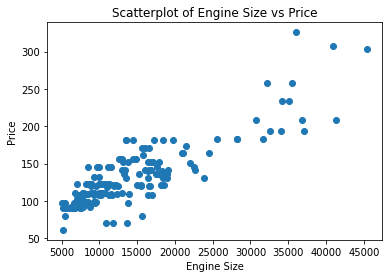

In [110]:
# Diagrama de disperción de dos variables
y=df["engine-size"]
x=df["price"]
plt.scatter(x,y)
plt.title("Scatterplot of Engine Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")

### GroupBy in Python

In [111]:
# Crea subset
df_test=df[["drive-wheels","body-style","price"]]
# Agrupa por variables
df_grp=df_test.groupby(["drive-wheels","body-style"],as_index=False).mean() #as_index=False crea una tabla en vez de columnas agrupadas
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [112]:
# Transforma el group by anterior a una pivot table
df_pivot=df_grp.pivot(index="drive-wheels",columns="body-style")
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

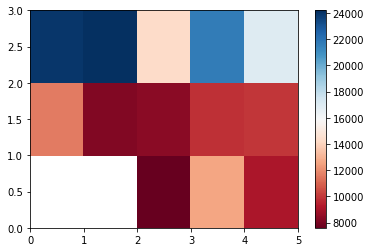

In [113]:
# plot pivot table como heatmap
plt.pcolor(df_pivot,cmap="RdBu")
plt.colorbar()
plt.show()

### Analysis of Variance ANOVA

In [114]:
# Crea subset de df
df_anova=df[["make","price"]]
# Crea df agrupada por make
grouped_anova=df_anova.groupby(["make"])

In [115]:
# Crea tabla anova
anova_results_1=stats.f_oneway(grouped_anova.get_group("honda")["price"], grouped_anova.get_group("subaru")["price"])
anova_results_1

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)

El precio para honda y subara no es significativamente diferente. Vemos que el F-value es menor que 1 y el p-valor es mayor que 0.05

In [116]:
# Crea tabla anova
anova_results_2=stats.f_oneway(grouped_anova.get_group("honda")["price"], grouped_anova.get_group("jaguar")["price"])
anova_results_2

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)

El precio para honda y jaguar si es significativamente diferente. Vemos que el F-value es mucho mayor que 1 y el p-valor es mayor que menor que 0.05.

Podemos decir que hay una correlación grande entre una variable categórica (honda o jaguar) y otra variable (price)

### Correlation

correlación != causation

(0.0, 53116.842238966114)

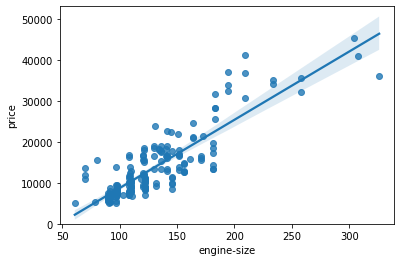

In [117]:
# Crea gráfico de disperción con estimación de regresión lineal
sns.regplot(x="engine-size",y="price",data=df)
plt.ylim(0,)

Observamos una linea creciente. Se puede decir:

* Que las variables tienen una relación lineal positiva
* que hay una correlacíon positiva entre engine size y price. Linear negative relation-ship

(0.0, 47414.1)

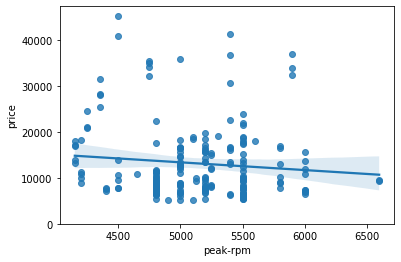

In [118]:
# Crea gráfico de disperción con estimación de regresión lineal
sns.regplot(x="peak-rpm",y="price",data=df)
plt.ylim(0,)

Observamos una linea decreciente. Se puede decir:
* Que las variables tienen una relación lineal negativa
* que hay una correlacíon negativa entre peak rpm y price

### Correlation - Statistics

Pearson correlation:

    -> Cerca de 1: Gran relación positiva
    -> Cerca de -1: Gran relación negativa
    -> Cerca de 0: Sin relación

Pearson correlation P-VALUE:

    -> p-value < 0.001: gran certeza del resultado
    -> p-value < 0.05: certeza moderada del resultado
    -> p-value < 0.1: certeza débil del resultado
    -> p-value > 0.1: sin certeza del resultado

In [119]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)
# reset index, because we droped some rows
df.reset_index(drop=True, inplace=True)

In [120]:
# person correlation
pearson_coef, p_value = stats.pearsonr(df["horsepower"],df["price"])
print(f"Person coef: {pearson_coef}\np-value: {p_value}")

Person coef: 0.8095745670036559
p-value: 6.369057428260101e-48


Con una certeza casi del 100% el coef de person para horsepower y price es de .81

### Lab

In [121]:
# Question #1:
# What is the data type of the column "peak-rpm"?

# Write your code below and press Shift+Enter to execute 
df["peak-rpm"].dtype

dtype('float64')

In [122]:
# correlation of all num variables
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075819,0.279740,0.066171,-0.029807,-0.082391
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217299,0.239543,0.238567,0.181189,0.133999
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371147,-0.360305,0.476153,0.577576,0.584642
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579821,-0.285970,0.657373,0.707108,0.690628
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615077,-0.245800,0.673363,0.736728,0.751265
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087027,-0.309974,0.003811,0.084301,0.135486
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757976,-0.279361,0.785353,0.836921,0.834415
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822676,-0.256733,0.745059,0.783465,0.872335
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,0.554610,0.559112,0.543155
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098267,-0.063561,0.036133,0.047089,0.082269


In [123]:
# Question #2: 
# Find the correlation between the following columns: bore, stroke, compression-ratio, and horsepower.

# Hint: if you would like to select those columns, use the following syntax: df[['bore','stroke','compression-ratio','horsepower']]

df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187871,0.098267
compression-ratio,0.001263,0.187871,1.000000,-0.214514
horsepower,0.566936,0.098267,-0.214514,1.000000


In [124]:
# Question 3 a): 
# Find the correlation between x="stroke" and y="price".

# Hint: if you would like to select those columns, use the following syntax: df[["stroke","price"]].
df[["stroke","price"]].corr()

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


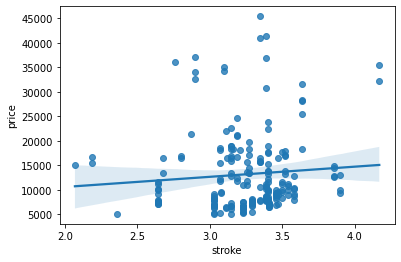

In [125]:
# Question 3 b):
# Given the correlation results between "price" and "stroke", do you expect a linear relationship?

# Verify your results using the function "regplot()".
sns.regplot(x="stroke", y="price", data=df)

In [126]:
# Describe variables no num
df.describe(include=['object'])

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,3,5,3,2,6,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,181,165,113,94,118,198,145,157,92


In [127]:
# Crea tabla de info value counts
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
#Cambiar nombre de columna
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
#Imprime
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [128]:
#Agrega titulo al index
drive_wheels_counts.index.name = 'drive-wheels'
#imprime
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [129]:
# Question 4:
# Use the "groupby" function to find the average "price" of each car based on "body-style".

# Write your code below and press Shift+Enter to execute 
# grouping results
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


### Graded Review Questions

In [130]:
##2
df_test = df[['body-style', 'price']]
df_grp = df_test.groupby(['body-style'], as_index=False).mean()

#What are resulting values of df_grp[‘price’]?
df_grp["price"]

0    21890.500000
1    22208.500000
2     9957.441176
3    14459.755319
4    12371.960000
Name: price, dtype: float64

### Evidencias

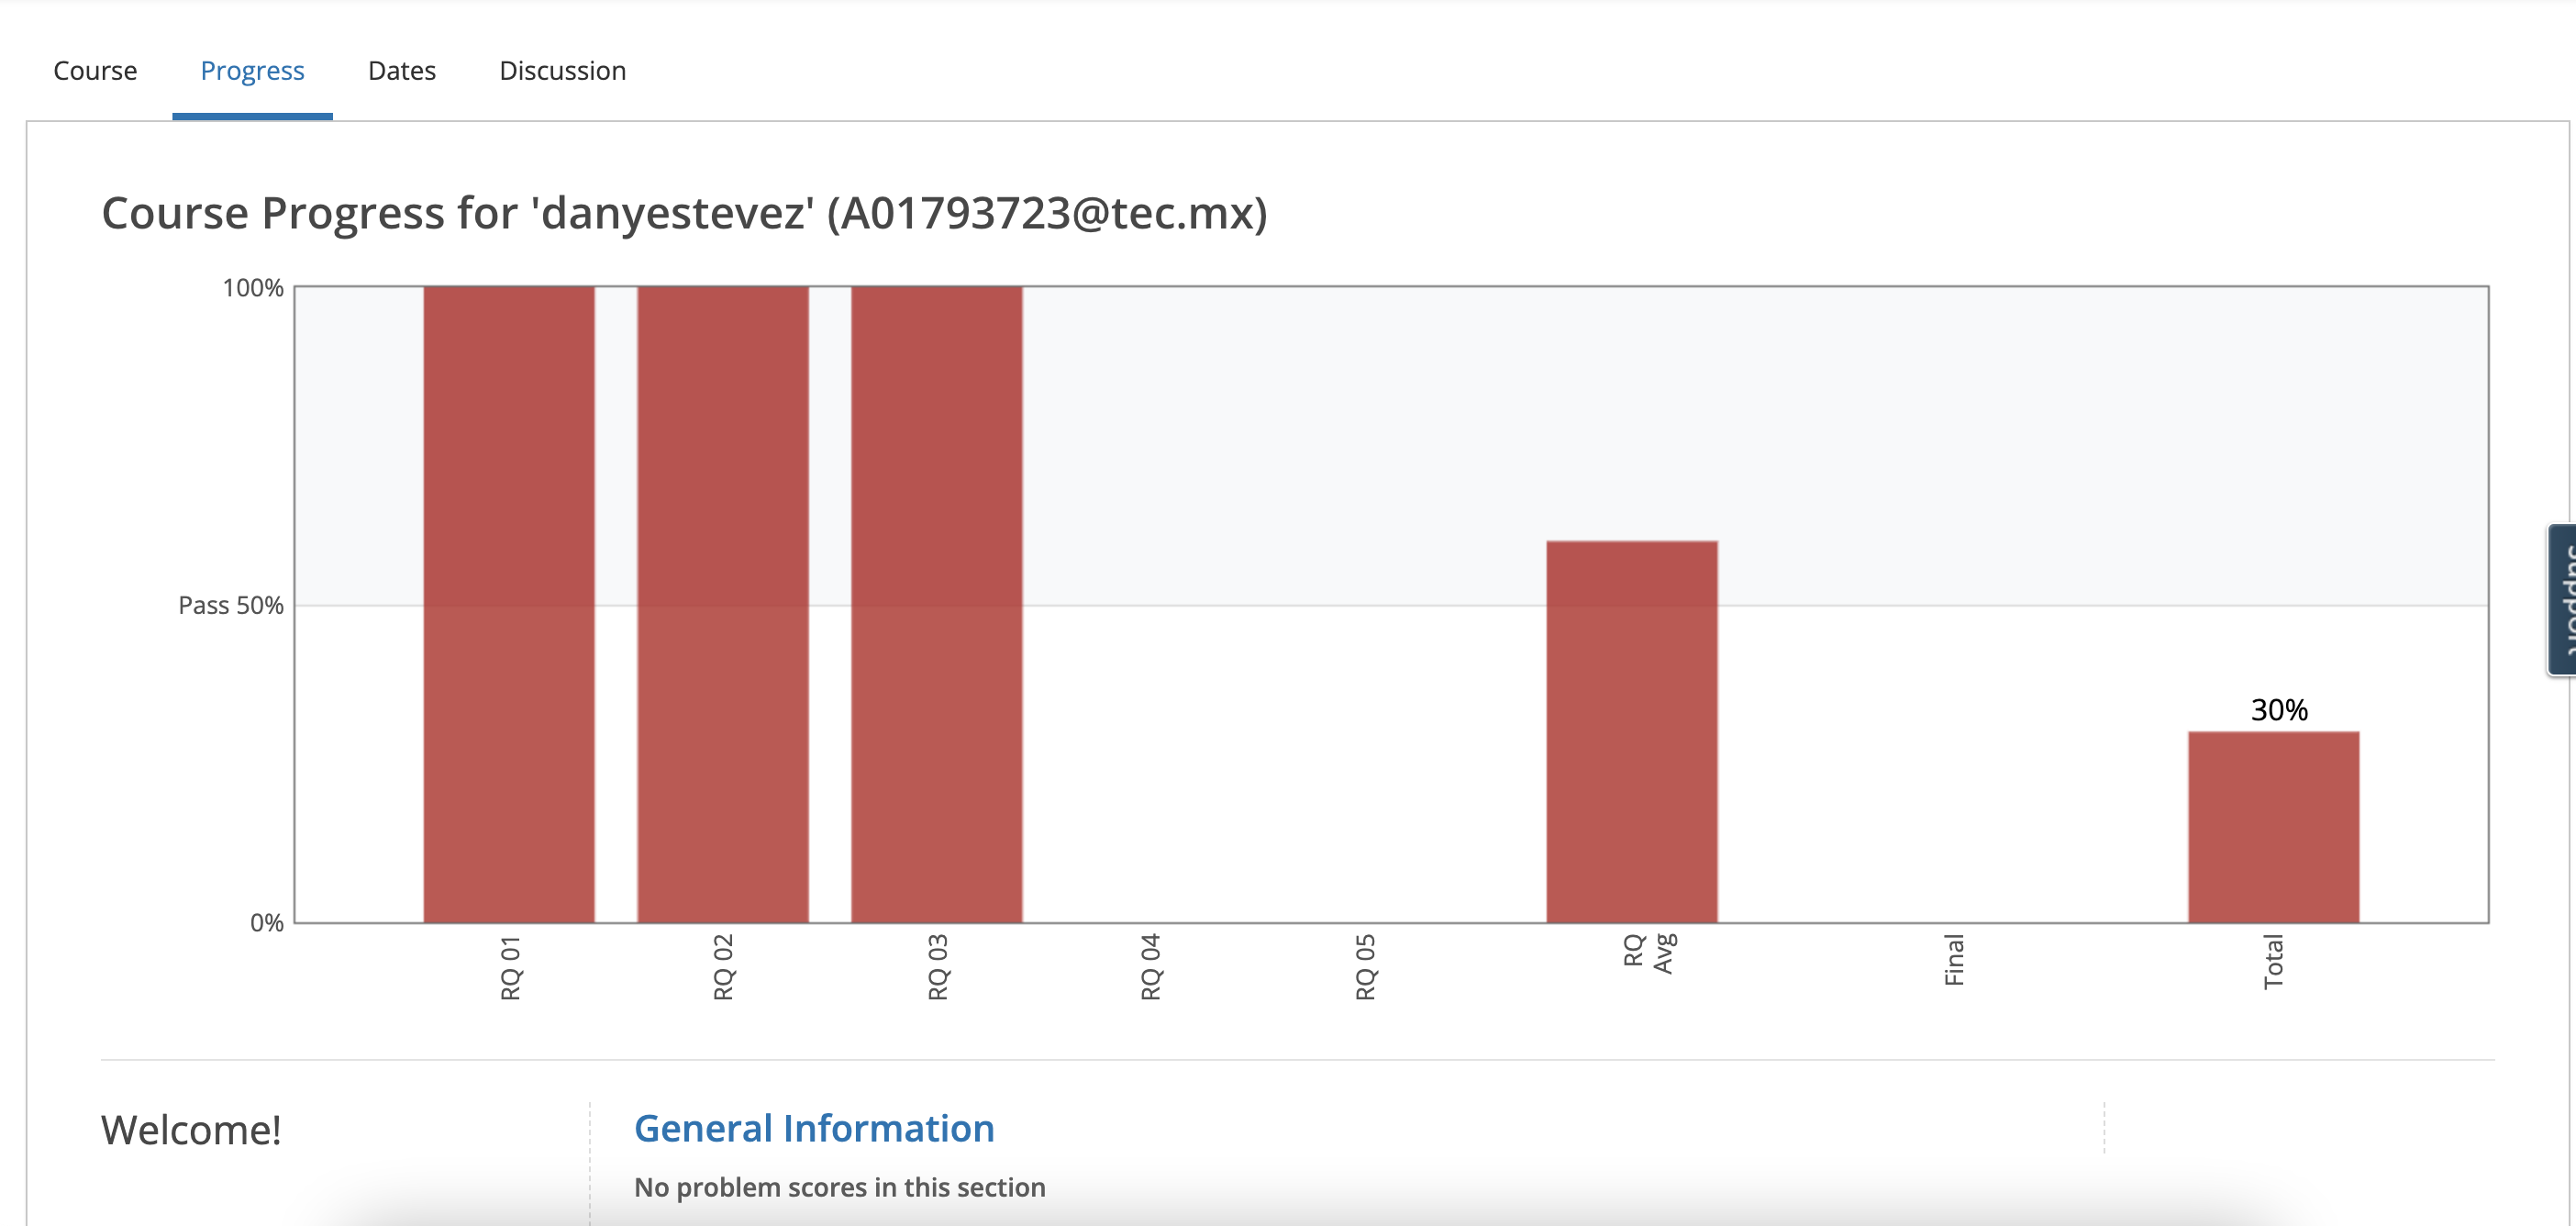